## STEP 1: COLLECT DATA

#### Load libraries

In [2]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score
#from causalinference import CausalModel


#### Load data

In [9]:
df = pd.read_csv(r'data\ZXC.csv')#Загрузка csv файла в переменную df
df['Conflict'] = df['Conflict']==1# Делаем значение тру фалс в столбце конфликт
df['Size_company']=df['Size_company']==0# Делаем значение тру фалс в столбце размер компании
df['T']=df['T']==0# Делаем значение тру фалс в столбце Т
df

,№,Name,Reg_num,Name_eng,Date,Nalog,Reion,Otrasl,Kod_otrasl,Forma,...,Profit_pure,Period_dolg_dnu,Period_zapas_dni,Period_deb_dolg_dni,Koef_autonomi,Returns,Clr,Cfl,Cal,Long_obiaz
0,1,"ИНКАРТ, НАО",1030000000000.00,"INKART, NAO",34522,7802067700,Санкт-Петербург,Производство медицинских инструментов и оборуд...,32.5,Непубличные акционерные общества,...,-1916000.00,75.74,91.50,42,0.55,-0.03,1.99,0.79,0.06,NaN
1,1,"ИНКАРТ, НАО",1030000000000.00,"INKART, NAO",34522,7802067700,Санкт-Петербург,Производство медицинских инструментов и оборуд...,32.5,Непубличные акционерные общества,...,-5206000.00,56.26,62.00,39,0.35,-0.07,1.33,0.59,0.08,NaN
2,1,"КАНГО ТРАНС, ООО",1080000000000.00,"KANGO TRANS, LTD",39219,7813379162,Санкт-Петербург,"Деятельность вспомогательная прочая, связанная...",52.29,Общества с ограниченной ответственностью,...,792000.00,10.73,0.30,54,0.85,0.02,6.57,6.57,0.36,NaN
3,1,"КАНГО ТРАНС, ООО",1080000000000.00,"KANGO TRANS, LTD",39219,7813379162,Санкт-Петербург,"Деятельность вспомогательная прочая, связанная...",52.29,Общества с ограниченной ответственностью,...,138000.00,10.92,0.20,77,0.89,0.01,9.19,9.14,0.63,NaN
4,1,"СОЮЗ СТРОЙ КОМПЛЕКТ-19, ООО",1150000000000.00,"SOYUZ STROI KOMPLEKT-19, OOO",41887,7814622130,Санкт-Петербург,"Деятельность агентов, специализирующихся на оп...",46.18.3,Общества с ограниченной ответственностью,...,2027000.00,8.62,4.70,5,0.29,0.01,1.42,0.68,0.15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57397,10000,"ДЕ ЛАЙТ, ООО",1030000000000.00,"DE LAIT, OOO",37575,7813176451,Санкт-Петербург,"Торговля оптовая лесоматериалами, строительным...",46.73,Общества с ограниченной ответственностью,...,3348000.00,83.00,24.70,28,0.28,0.04,1.39,0.68,0.17,NaN
57398,10000,"НАША МЕБЕЛЬ ПРЕСТИЖ, ООО",1180000000000.00,"NASHA MEBEL PRESTIZH, OOO",43011,7814706415,Санкт-Петербург,"Торговля розничная мебелью, осветительными при...",47.59,Общества с ограниченной ответственностью,...,3040000.00,5.74,7.80,3,0.76,0.07,4.10,2.34,1.70,NaN
57399,10000,"НАША МЕБЕЛЬ ПРЕСТИЖ, ООО",1180000000000.00,"NASHA MEBEL PRESTIZH, OOO",43011,7814706415,Санкт-Петербург,"Торговля розничная мебелью, осветительными при...",47.59,Общества с ограниченной ответственностью,...,6486000.00,20.41,33.90,10,0.87,0.24,7.67,5.36,4.81,NaN
57400,10000,"НОРД ВАЙН, ООО ПО",1170000000000.00,"PA NORD WINE, LLC",42710,7811631183,Санкт-Петербург,Производство сидра и прочих плодовых вин,11.03,Общества с ограниченной ответственностью,...,169000.00,3.18,6.30,18,0.85,0.01,6.43,4.60,1.07,NaN


#### Prepare data

In [11]:
df=df.loc[(df['Returns'] >= -10)] #Оставляем значение рентабельности больше -10
df = df.filter(['Conflict', 'Size_company', 'T','Capital','Clr','Returns','Workers','Osn_sred','Zapas','Deb_dolg','Active','Sr_obiaz','Sobs_capital','Renue','Sebestoist_sales','Profit','Profit_pure','Period_dolg_dnu','Period_zapas_dni','Period_deb_dolg_dni','Koef_autonomi','Cfl','Cal']).dropna().reset_index(drop=True)#Оставляем только указанные столбцы и убираем пропуски

In [12]:
Conflict = 'Conflict'
Returns = 'Returns'
df.groupby(Conflict)[Returns].describe()#Выводит табличку снизу

,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,32219.00,0.06,0.10,-0.50,0.01,0.03,0.08,0.50
True,233.00,0.05,0.09,-0.38,0.01,0.02,0.06,0.49


#### Create plot (Company year)

C_COLOUR = 'grey'
T_COLOUR = 'green'
C_LABEL = 'False_Conflict'
T_LABEL = 'Conflict'
sns.kdeplot(data=df[~df[Conflict]], x='Company_year', shade=True,
            color=C_COLOUR, label=C_LABEL)
sns.kdeplot(data=df[df[Conflict]], x='Company_year', shade=True,
            color=T_COLOUR, label=T_LABEL)
plt.legend();

The Conflict group has more younger company compared to the False_Conflict

#### Create bar plot (Size company)

In [13]:
F_COLOUR = 'magenta'
M_COLOUR = 'blue'
F_LABEL = 'Macro'
M_LABEL = 'Micro'

size_company = 100 * pd.crosstab(df[Conflict].replace({True: T_LABEL,
                                                        False: C_LABEL}),
                                 df['Size_company'].replace({True: 'Macro',
                                                             False: 'Micro'}),
                                 normalize='index')
size_company['All'] = 100

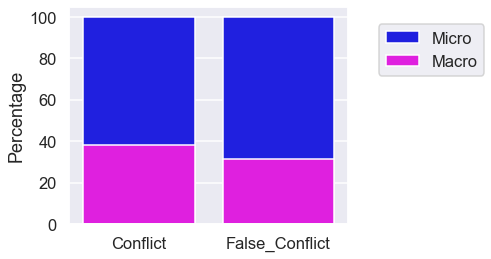

In [14]:

plt.figure(figsize=(5, 4))
sns.barplot(data=size_company, x=size_company.index.astype(str),  y="All",
            color=M_COLOUR, label=M_LABEL)
sns.barplot(data=size_company, x=size_company.index.astype(str),  y='Micro',
            color=F_COLOUR, label=F_LABEL)
plt.legend(loc='center', bbox_to_anchor=(1.3, 0.8))
plt.xlabel('')
plt.ylabel('Percentage');

More micro company in conflict group

## STEP 2: ESTIMATE PROPENSITY SCORES


Once we have collected the data, we can build the propensity model predicting the probability of receiving the treatment given the confounders. Typically, logistic regression is used for this classification model. Let’s build a propensity model:

#### Build a descriptive model

In [15]:
t = df[Conflict]
X = pd.get_dummies(df.drop(columns=[Returns, Conflict]))
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_classifier', LogisticRegression())
])#Задаем параметры конвеера
pipe.fit(X, t)#Обучаем модель (запускаем конвеер)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_classifier', LogisticRegression())])

#### Predict

In [16]:
threshold = 0.5
df['proba'] = pipe.predict_proba(X)[:,1]#Записываем предсказание в столбец proba
df['logit'] = df['proba'].apply(lambda p: np.log(p/(1-p)))#На основе proba считаем столбец logit
df['pred'] = np.where(df['proba']>=threshold, 1, 0)#Создаем столбец Pred и по предсказанию записываем туда 1 или 0
df['proba']

0       0.01
1       0.01
2       0.01
3       0.01
4       0.01
        ... 
32447   0.01
32448   0.01
32449   0.01
32450   0.01
32451   0.01
Name: proba, Length: 32452, dtype: float64

#### Оценка модели

In [17]:
print(f"Accuracy: {np.mean(df[Conflict]==df['pred']):.4f},\
 ROC AUC: {roc_auc_score(df[Conflict], df['proba']):.4f},\
 F1-score: {f1_score(df[Conflict], df['pred']):.4f}")#Считаем точность предсказания (в нашем исследовании не нужно)
# Visualise confusion matrix
pd.crosstab(df[Conflict], df['pred']).rename(columns={0: False,
                                                       1:True})

Accuracy: 0.9928, ROC AUC: 0.5920, F1-score: 0.0000


pred,False
Conflict,
False,32219
True,233


#### We will inspect the distribution of the propensity score and its logit transformation by the conflict groups:

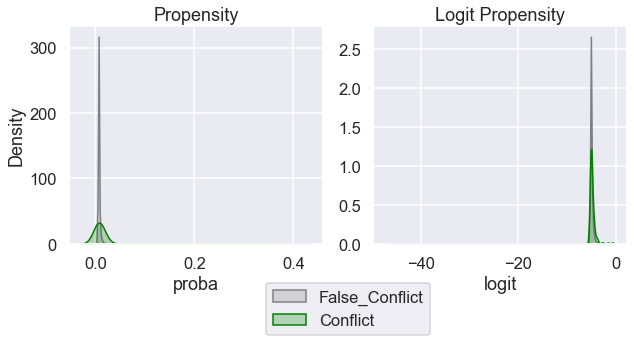

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
# Visualise propensity
sns.kdeplot(data=df[~df[Conflict]], x='proba', shade=True,
            color=C_COLOUR, label=C_LABEL, ax=ax[0])
sns.kdeplot(data=df[df[Conflict]], x='proba', shade=True,
            color=T_COLOUR, label=T_LABEL, ax=ax[0])
ax[0].set_title('Propensity')
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3))
# Visualise logit propensity
sns.kdeplot(data=df[~df[Conflict]], x='logit', shade=True,
            color=C_COLOUR, label=C_LABEL, ax=ax[1])
sns.kdeplot(data=df[df[Conflict]], x='logit', shade=True,
            color=T_COLOUR, label=T_LABEL, ax=ax[1])
ax[1].set_title('Logit Propensity')
ax[1].set_ylabel("");

## STEP 3: MATCH RECORDS

In [19]:
# Sort by 'logit' so it's quicker to find match
df.sort_values('logit', inplace=True)
n = len(df)-1

for i, (ind, row) in enumerate(df.iterrows()):
    # Match the most similar untreated record to each treated record
    above = df.iloc[i:]
    control_above = above[~above[Conflict]]
    match_above = control_above.iloc[0]

    distance_above = match_above['logit'] - row['logit']


    if row[Conflict]:
            # Find the closest untreated match among records sorted
            # higher. 'equal_or_above would' be more accurate but
            # used 'above' for brevity
            if i<n:
                above = df.iloc[i:]
                control_above = above[~above[Conflict]]
                match_above = control_above.iloc[0]
                distance_above = match_above['logit'] - row['logit']
                df.loc[ind, 'match'] = match_above.name
                df.loc[ind, 'distance'] = distance_above

            # Find the closest untreated match among records sorted
            # lower. 'equal_or_below' would be more accurate but
            # used 'below' for brevity
            if i>0:
                below = df.iloc[:i-1]
                control_below = below[~below[Conflict]]
                match_below = control_below.iloc[-1]
                distance_below = match_below['logit'] - row['logit']
                if i==n:
                    df.loc[ind, 'match'] = match_below.name
                    df.loc[ind, 'distance'] = distance_below

                # Only overwrite if match_below is closer than match_above
                elif distance_below<distance_above:
                    df.loc[ind, 'match'] = match_below.name
                    df.loc[ind, 'distance'] = distance_below
df[df[Conflict]]

,Conflict,Size_company,T,Clr,Returns,Workers,Osn_sred,Zapas,Deb_dolg,Active,...,Period_zapas_dni,Period_deb_dolg_dni,Koef_autonomi,Cfl,Cal,proba,logit,pred,match,distance
16145,True,True,False,210.50,0.43,59.00,96021000.00,36134000.00,9543000.00,1074654000,...,57.40,61,1.00,202.73,200.57,0.00,-5.34,0,11551.00,-0.00
9741,True,True,False,4.87,0.29,10.00,9129000.00,499000.00,90535000.00,107491000,...,14.80,1513,0.81,4.85,0.36,0.01,-5.29,0,26972.00,-0.00
28145,True,False,True,11.23,0.46,37.00,1426000.00,752000.00,7278000.00,70804000,...,2.10,28,0.91,11.11,9.93,0.01,-5.28,0,19076.00,-0.00
9740,True,True,True,3.35,0.24,10.00,9414000.00,1173000.00,79926000.00,97716000,...,18.30,1732,0.73,3.30,0.27,0.01,-5.28,0,16284.00,-0.00
11657,True,True,False,11.17,0.35,10.00,19363000.00,5000.00,22944000.00,59487000,...,0.10,446,0.94,11.17,4.78,0.01,-5.27,0,17161.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,True,False,False,2.42,0.01,479.00,180306000.00,28074000.00,166434000.00,401769000,...,15.60,87,0.49,2.09,0.07,0.07,-2.54,0,5830.00,-0.03
1388,True,False,False,1.01,0.00,563.00,16277000.00,17113000.00,429455000.00,511800000,...,9.60,230,0.43,0.97,0.08,0.16,-1.66,0,5737.00,-0.38
1387,True,False,True,1.01,0.00,587.00,13391000.00,20188000.00,466806000.00,541296000,...,8.10,244,0.32,0.97,0.08,0.18,-1.51,0,3368.00,-0.02
4455,True,False,False,0.72,0.07,41.00,51014000.00,325192000.00,2687878000.00,4742466000,...,335.40,1915,0.03,0.65,0.06,0.32,-0.74,0,4533.00,-0.38


####  We will now create a new data set called matched_df that contains the original Conflict group and a new control group:

In [20]:
#Мэтчим выборки
indices = df[df['match'].notna()].index. \
    append(pd.Index(df.loc[df['match'].notna(), 'match']))
matched_df = df.loc[indices].reset_index(drop=True)
matched_df

,Conflict,Size_company,T,Clr,Returns,Workers,Osn_sred,Zapas,Deb_dolg,Active,...,Period_zapas_dni,Period_deb_dolg_dni,Koef_autonomi,Cfl,Cal,proba,logit,pred,match,distance
0,True,True,False,210.50,0.43,59.00,96021000.00,36134000.00,9543000.00,1074654000,...,57.40,61,1.00,202.73,200.57,0.00,-5.34,0,11551.00,-0.00
1,True,True,False,4.87,0.29,10.00,9129000.00,499000.00,90535000.00,107491000,...,14.80,1513,0.81,4.85,0.36,0.01,-5.29,0,26972.00,-0.00
2,True,False,True,11.23,0.46,37.00,1426000.00,752000.00,7278000.00,70804000,...,2.10,28,0.91,11.11,9.93,0.01,-5.28,0,19076.00,-0.00
3,True,True,True,3.35,0.24,10.00,9414000.00,1173000.00,79926000.00,97716000,...,18.30,1732,0.73,3.30,0.27,0.01,-5.28,0,16284.00,-0.00
4,True,True,False,11.17,0.35,10.00,19363000.00,5000.00,22944000.00,59487000,...,0.10,446,0.94,11.17,4.78,0.01,-5.27,0,17161.00,-0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,False,False,False,1.67,0.09,557.00,29255000.00,1447000.00,60074000.00,124225000,...,1.10,53,0.45,1.65,0.52,0.07,-2.56,0,NaN,NaN
462,False,False,True,0.47,0.18,9.00,7148000.00,18587000.00,1798460000.00,6664411000,...,218.90,14283,0.01,0.47,0.11,0.12,-2.04,0,NaN,NaN
463,False,False,True,1.00,0.01,3.00,72000.00,147183000.00,3089508000.00,3342141000,...,201.30,3625,0.00,0.96,0.03,0.18,-1.53,0,NaN,NaN
464,False,False,True,1.81,0.06,91.00,276023000.00,174252000.00,3170407000.00,6713771000,...,57.60,1754,0.03,1.76,0.86,0.25,-1.12,0,NaN,NaN


This new control group should be more similar to the Conflict group according to the confounding factors. Let’s find out if that’s the case in the next section.

## STEP 4: EVALUATE THE QUALITY OF THE MATCHED RECORDS


It’s time to evaluate how good the matching was. Let’s inspect if the groups look more comparable in terms of the confounders:



In [22]:
COLUMNS = ['Size_company','T','Zapas','Clr', Returns]
matches = pd.merge(df.loc[df[Conflict], COLUMNS+['match']],
                   df[COLUMNS], left_on='match',
                   right_index=True,
                   how='left', suffixes=('_t', '_c'))
matches

,Size_company_t,T_t,Zapas_t,Clr_t,Returns_t,match,Size_company_c,T_c,Zapas_c,Clr_c,Returns_c
16145,True,False,36134000.00,210.50,0.43,11551.00,True,True,18745000.00,56.17,0.19
9741,True,False,499000.00,4.87,0.29,26972.00,True,False,453000.00,30.09,0.27
28145,False,True,752000.00,11.23,0.46,19076.00,True,False,440000.00,7.63,0.11
9740,True,True,1173000.00,3.35,0.24,16284.00,True,False,463000.00,11.18,0.00
11657,True,False,5000.00,11.17,0.35,17161.00,False,False,6509000.00,5.52,0.30
...,...,...,...,...,...,...,...,...,...,...,...
1601,False,False,28074000.00,2.42,0.01,5830.00,False,False,1447000.00,1.67,0.09
1388,False,False,17113000.00,1.01,0.00,5737.00,False,True,18587000.00,0.47,0.18
1387,False,True,20188000.00,1.01,0.00,3368.00,False,True,147183000.00,1.00,0.01
4455,False,False,325192000.00,0.72,0.07,4533.00,False,True,174252000.00,1.81,0.06


#### Let’s now check the distribution:

In [24]:
#Сравниваем показатели до мэтча и после
for var in ['logit', 'Clr']:
    print(f"{var} | Before matching")
    display(df.groupby(Conflict)[var].describe())
    print(f"{var} | After matching")
    display(matched_df.groupby(Conflict)[var].describe())

logit | Before matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,32219.00,-5.00,0.52,-47.21,-5.14,-5.05,-4.94,-0.27
True,233.00,-4.81,0.64,-5.34,-5.13,-4.99,-4.77,-0.64


logit | After matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,233.00,-4.82,0.61,-5.34,-5.13,-4.99,-4.77,-1.04
True,233.00,-4.81,0.64,-5.34,-5.13,-4.99,-4.77,-0.64


Clr | Before matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,32219.00,5.08,68.22,0.00,1.05,1.41,2.91,7033.50
True,233.00,4.88,16.62,0.08,1.05,1.29,2.42,210.50


Clr | After matching


,count,mean,std,min,25%,50%,75%,max
Conflict,,,,,,,,
False,233.00,4.11,11.51,0.24,1.04,1.41,2.56,134.95
True,233.00,4.88,16.62,0.08,1.05,1.29,2.42,210.50


The distribution looks more similar between the groups now after the matching

####  Let’s visualize the distributions:

#Рисуем графики
for var in ['logit', 'Company_year']:
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    # Visualise original distribution
    sns.kdeplot(data=df[~df[Conflict]], x=var, shade=True,
                color=C_COLOUR, label=C_LABEL, ax=ax[0])
    sns.kdeplot(data=df[df[Conflict]], x=var, shade=True,
                color=T_COLOUR, label=T_LABEL, ax=ax[0])
    ax[0].set_title('Before matching')

    # Visualise new distribution
    sns.kdeplot(data=matched_df[~matched_df[Conflict]], x=var,
                shade=True, color=C_COLOUR, label=C_LABEL, ax=ax[1])
    sns.kdeplot(data=matched_df[matched_df[Conflict]], x=var,
                shade=True, color=T_COLOUR, label=T_LABEL, ax=ax[1])
    ax[1].set_title('After matching')
    ax[1].set_ylabel("")
    plt.tight_layout()
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3));

#### Let’s inspect the distribution of size company:

In [25]:
#Сравниваем показатели до мэтча и после мэтча
print(f"{'is_Macro'} | Before matching")
display(pd.crosstab(df[Conflict], df['Size_company'],
                    normalize='index'))
print(f"{'is_Macro'} | After matching")
display(pd.crosstab(matched_df[Conflict], matched_df['Size_company'],
                    normalize='index'))

is_Macro | Before matching


Size_company,False,True
Conflict,,
False,0.31,0.69
True,0.38,0.62


is_Macro | After matching


Size_company,False,True
Conflict,,
False,0.39,0.61
True,0.38,0.62


#### Рисуем графики до и после мэтчинга по размеру компании

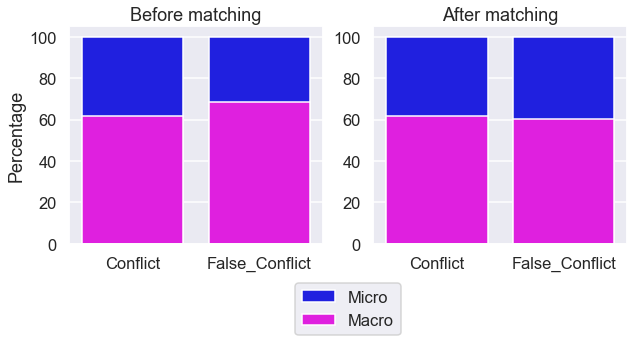

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# Visualise original distribution
sns.barplot(data=size_company, x=size_company.index.astype(str), y="All",
            color=M_COLOUR, label=M_LABEL, ax=ax[0])
sns.barplot(data=size_company, x=size_company.index.astype(str), y='Macro',
            color=F_COLOUR, label=F_LABEL, ax=ax[0])
ax[0].legend(loc='center', bbox_to_anchor=(1.1, -0.3))
ax[0].set_xlabel('')
ax[0].set_ylabel('Percentage')
ax[0].set_title('Before matching')
# Visualise new distribution
size_company_after = 100 * pd.crosstab(
    matched_df[Conflict].replace({True: T_LABEL, False: C_LABEL}),
    matched_df['Size_company'].replace({True: 'Macro', False: 'Micro'}),
    normalize='index'
)
size_company_after['All'] = 100
sns.barplot(data=size_company_after, x=size_company_after.index.astype(str),
            y="All", color=M_COLOUR, label=M_LABEL, ax=ax[1])
sns.barplot(data=size_company_after, x=size_company_after.index.astype(str),
            y='Macro', color=F_COLOUR, label=F_LABEL, ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_title('After matching')
ax[1].set_ylabel('');

#### Записываем мэтченные данные в файл

In [28]:
matched_df.rename(columns = {'T':'Time'}, inplace = True )#Переименовываем столбец T в Time
matched_df.Size_company = matched_df.Size_company.replace({True: 1, False: 0})#Заменяем TRUE/FALSE на 1/0
matched_df.Time = matched_df.Time.replace({True: 1, False: 0})#Заменяем TRUE/FALSE на 1/0
matched_df.Conflict = matched_df.Conflict.replace({True: 1, False: 0})#Заменяем TRUE/FALSE на 1/0

matched_df.to_csv (r'Data\matched_df.csv', index= False )#Записали в csv файл
